In [10]:
# from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [2]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [3]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [11]:
df[['target']]

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [7]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

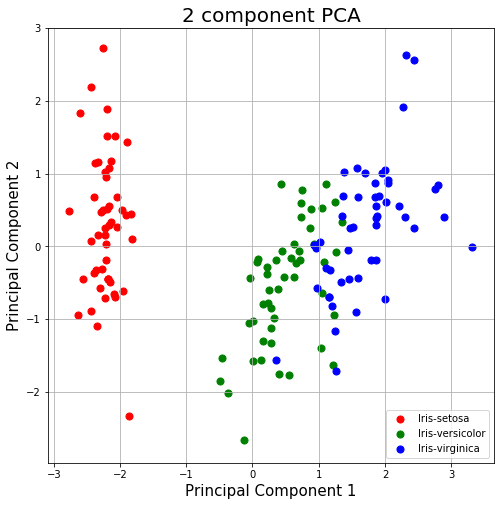

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [1]:
import csv
path = 'movement_libras.data'
reader = csv.reader(open(path))
l = list(reader)

In [3]:
import numpy as np
full = np.array(l)
feature = full[:, 0:89]
target = full[:, 90]

In [5]:
import pandas as pd
tableF = pd.DataFrame(feature)

In [7]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
tableF = StandardScaler().fit_transform(tableF)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(tableF)

In [11]:
targetDf = pd.DataFrame(data = target, columns = ['target'])

In [13]:
principal_feature = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principal_feature, targetDf], axis = 1)
print(finalDf)

     principal component 1  principal component 2 target
0                 1.435505              -0.339579      1
1                 3.312795              -0.504072      1
2                 2.896192               1.276771      1
3                 4.059966              -3.299897      1
4                 0.756110               2.587759      1
..                     ...                    ...    ...
355              -7.202644               0.097647     15
356              -5.480583               1.084278     15
357              -6.295341              -1.114828     15
358              -7.202644               0.097647     15
359              -5.480583               1.084278     15

[360 rows x 3 columns]


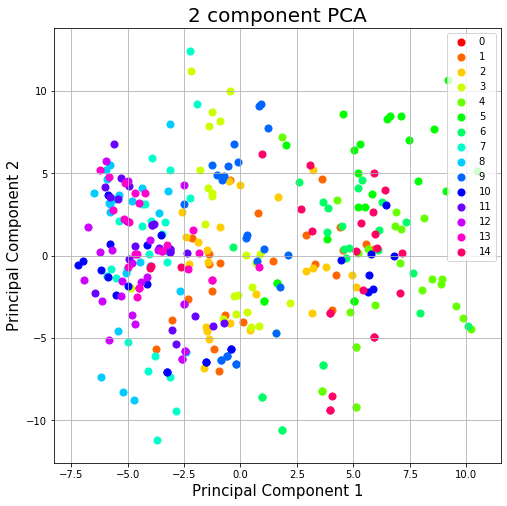

In [14]:
import matplotlib.pyplot as plt
import colorsys
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
#colors = ['r', 'g', 'b']
#for target, color in zip(targets,colors):
for i in range(15):
    c = colorsys.hsv_to_rgb(i/15, 1,1)
    indicesToKeep = finalDf['target'] == str(i)
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , color = c
               , s = 50)
ax.legend(range(15))
ax.grid()